In [18]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
import os, shutil
from sklearn.preprocessing import LabelEncoder

In [ ]:
#%pwd

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
path1 = './drive/MyDrive/Colab_Notebooks/CNN'
genpath = './drive/MyDrive/Colab_Notebooks/GenImg'

In [4]:
# 定義ImageDataGenerator
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, 
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

# 定義ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
# dic = {}
# for i, j in enumerate(os.listdir(path1)):
#   dic['j']=i

# print(dic)

In [5]:
if os.path.exists(genpath):
    shutil.rmtree(genpath)
os.makedirs(genpath)

n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    genpath2 = genpath + f'/{p}'
    if not os.path.exists(genpath2):
        os.makedirs(genpath2)
    #print(path2)
    #print(genpath2)
    #print(f'{p}')
    gen_data = img_gen.flow_from_directory(path1, batch_size=10, shuffle=False, save_to_dir=genpath2,
              classes = [f'{p}'], class_mode = 'binary', save_prefix=f'{p}', save_format='jpg', target_size=(256, 256))
    for i in range(40):
        gen_data.next()

Found 20 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Found 9 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 8 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [6]:
x = []
y = []
n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    genpath2 = genpath + f'/{p}'
    for i in os.listdir(path2):
        img = cv2.imread(f'{path2}/{i}')
        img = cv2.resize(img, (256, 256))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))
    for i in os.listdir(genpath2):
        img = cv2.imread(f'{genpath2}/{i}')
        img = cv2.resize(img, (256, 256))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))


In [7]:
x = np.asarray(x)
x.shape

(3196, 256, 256, 3)

In [8]:
import pandas as pd
df = pd.DataFrame(y)
df[0]
y = df[0].map({'iMeiMilk': 0, 'LimFengInMilk': 1, 'JuHsiangMilk': 2, 'FreshDelightMilk': 3, 'KuangChuanMilk': 4, 
               'LargeReiSuiMilk': 5, 'SmallReiSuiMilk': 6, 'LowFatLargeReiSuiMilk': 7, 'LowFatSmallReiSuiMilk': 8})
print(y)

0       3
1       3
2       3
3       3
4       3
       ..
3191    8
3192    8
3193    8
3194    8
3195    8
Name: 0, Length: 3196, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2876, 256, 256, 3)
(2876,)
(320, 256, 256, 3)
(320,)


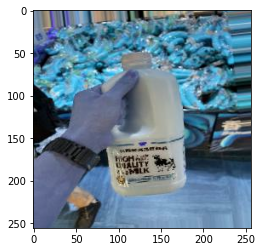

In [10]:
#x[:1]
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [11]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
z = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
z = Conv2D(64, (3, 3), strides=2, activation='relu')(z)
z = Conv2D(128, (3, 3), strides=2, activation='relu')(z)
z = Flatten()(z)
z = Dropout(0.2)(z)
z = Dense(512, activation='relu')(z)
z = Dropout(0.2)(z)
z = Dense(9, activation='softmax')(z)

model = Model(i, z)

In [12]:
# 編譯模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 訓練模型
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[learning_rate_function])

Epoch 1/50
90/90 [==============================] - 176s 2s/step - loss: 61.6404 - accuracy: 0.6707 - val_loss: 0.5527 - val_accuracy: 0.8219 - lr: 0.0010
Epoch 2/50
90/90 [==============================] - 166s 2s/step - loss: 0.2225 - accuracy: 0.9364 - val_loss: 0.4177 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 3/50
90/90 [==============================] - 167s 2s/step - loss: 0.1293 - accuracy: 0.9691 - val_loss: 0.2871 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 4/50
90/90 [==============================] - 169s 2s/step - loss: 0.2452 - accuracy: 0.9416 - val_loss: 0.5602 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 5/50
90/90 [==============================] - ETA: 0s - loss: 0.1398 - accuracy: 0.9673
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
90/90 [==============================] - 168s 2s/step - loss: 0.1398 - accuracy: 0.9673 - val_loss: 0.4068 - val_accuracy: 0.8719 - lr: 0.0010
Epoch 6/50
90/90 [==============================] - 168s 2s/step - los

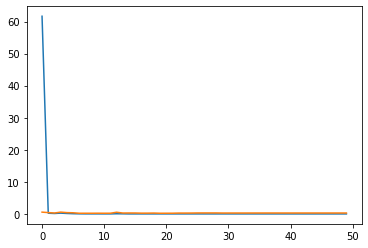

In [14]:
# 每迭代繪製損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

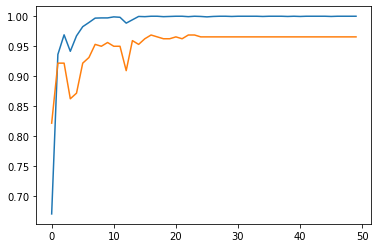

In [15]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [16]:
# 評估模型
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

90/90 [==============================] - 52s 583ms/step - loss: 6.7215e-06 - accuracy: 1.0000
[6.721472345816437e-06, 1.0]
10/10 [==============================] - 4s 397ms/step - loss: 0.2842 - accuracy: 0.9656
[0.2842085063457489, 0.965624988079071]


In [17]:
from sklearn.metrics import confusion_matrix
p_test = model.predict(x_test).argmax(axis=1)
cm_test = confusion_matrix(y_test, p_test)
print(cm_test)
p_train = model.predict(x_train).argmax(axis=1)
cm_train = confusion_matrix(y_train, p_train)
print(cm_train)

[[49  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0]
 [ 0  2  0  0  0 25  0  0  0]
 [ 0  0  0  2  0  0 35  0  2]
 [ 0  1  1  0  0  0  0 29  2]
 [ 0  0  0  0  0  0  1  0 19]]
[[371   0   0   0   0   0   0   0   0]
 [  0 338   0   0   0   0   0   0   0]
 [  0   0 295   0   0   0   0   0   0]
 [  0   0   0 373   0   0   0   0   0]
 [  0   0   0   0 379   0   0   0   0]
 [  0   0   0   0   0 288   0   0   0]
 [  0   0   0   0   0   0 381   0   0]
 [  0   0   0   0   0   0   0 240   0]
 [  0   0   0   0   0   0   0   0 211]]


In [ ]:
# 總結模型各層形狀與使用參數
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dropout (Dropout)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 512)               629806

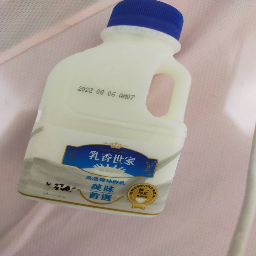

[[1.7378585e-04 6.7592395e-05 3.3455524e-07 9.3646784e-05 3.4902805e-06
  9.9965620e-01 2.3795949e-06 2.6586608e-06 3.9431947e-12]]
LargeReiSuiMilk


In [25]:
# 載入訓練好的model
# model.save('/content/drive/MyDrive/Colab_Notebooks/model_0822.h5')
model_pred = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/model_0822.h5')

# 要預測的圖片
img_path = '/content/drive/MyDrive/Colab_Notebooks/test_pic/JH_large.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (256, 256))
cv2_imshow(img)
img = np.array(img)
img_array = []
img_array.append(img)
img_array = np.asarray(img_array)

pred = model_pred.predict(img_array)
print(pred)

brand = {'iMeiMilk': 0, 'LimFengInMilk': 1, 'JuHsiangMilk': 2, 'FreshDelightMilk': 3, 'KuangChuanMilk': 4, 
 'LargeReiSuiMilk': 5, 'SmallReiSuiMilk': 6, 'LowFatLargeReiSuiMilk': 7, 'LowFatSmallReiSuiMilk': 8}

out = np.argmax(pred, axis=1)
for i in brand:
  if out == brand[i]:
    print(i)